**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
test_df.head()

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
train_df.head()

,id,text,emotion,intensity
1199,20342,Onus is on #Pak to act against #terror groups ...,fear,0.604
2148,30144,Riggs dumb ass hell lolol #hilarious #LethalWe...,joy,0.700
897,20040,First day of college feeling nervous,fear,0.865
2969,40142,The underground at Waterloo is not a nice plac...,sadness,0.688
948,20091,She was so posh it frightened me. I'm still sc...,fear,0.810


In [7]:
test_df.head()

,id,text,emotion,intensity
229,30858,It's #HobbitDay! \nHobbit's give gifts on thei...,joy,0.708
225,30854,So far ours greet have raised £250 for @HGatCh...,joy,0.625
227,30856,Each day is what you make of it! #goals #chall...,joy,0.423
208,30837,"...at your age, the heyday in the blood is tam...",joy,0.260
116,21179,"@spencer0415 awe, I love you kid!!",fear,0.060


In [8]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


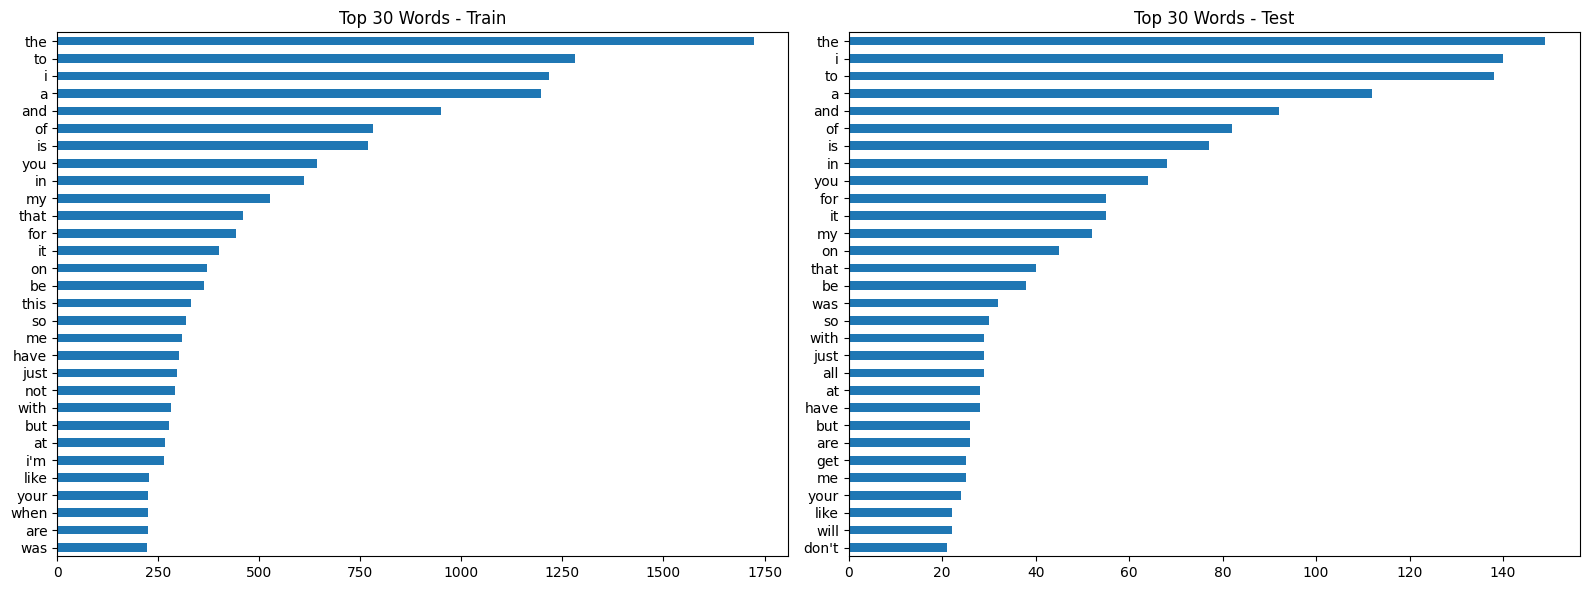

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Train
train_text = ' '.join(train_df['text']).lower().split()
train_freq_df = pd.Series(train_text).value_counts().head(30)

# Test
test_text = ' '.join(test_df['text']).lower().split()
test_freq_df = pd.Series(test_text).value_counts().head(30)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

train_freq_df.plot(kind='barh', ax=axes[0])
axes[0].set_title('Top 30 Words - Train')
axes[0].invert_yaxis()

test_freq_df.plot(kind='barh', ax=axes[1])
axes[1].set_title('Top 30 Words - Test')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [10]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [11]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [12]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

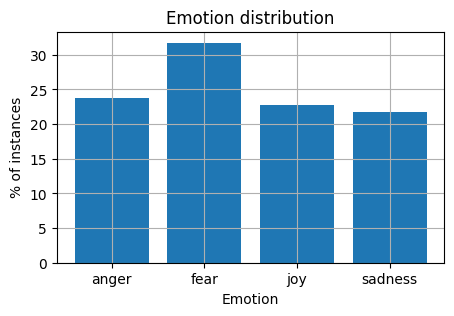

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [16]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [17]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [18]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [19]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [21]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [22]:
"😂" in feature_names

False

In [23]:
"love" in feature_names

True

Let's try using another tokenizer below.

In [24]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [25]:
train_data_BOW_features_500.toarray()

array([[0, 3, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [26]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [27]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [28]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# build TF-IDF vectorizer with 1000 features
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# fit and transform training data
TFIDF_1000.fit(train_df['text'])
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])
test_data_TFIDF_features_1000 = TFIDF_1000.transform(test_df['text'])

# check dimension
print("Shape:", train_data_TFIDF_features_1000.shape)

# observe feature names [100:110]
feature_names_1000 = TFIDF_1000.get_feature_names_out()
print("Feature names [100:110]:", feature_names_1000[100:110])

Shape: (3613, 1000)
Feature names [100:110]: ['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [30]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'joy', 'joy', 'fear', 'fear', 'fear', 'fear', 'sadness',
       'fear', 'sadness'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [31]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [32]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [33]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [34]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

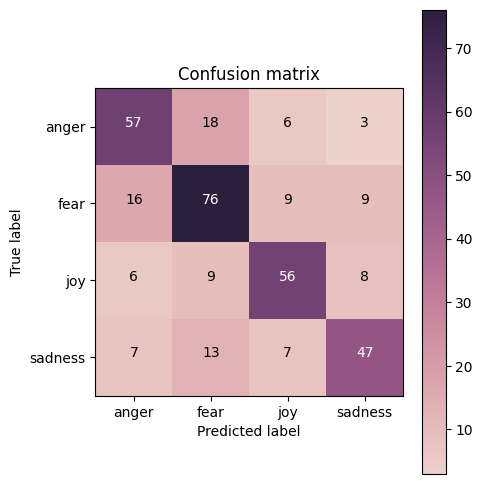

In [35]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [36]:
# Answer here
print("="*60)
print("INTERPRETATION OF RESULTS:")
print("="*60)
print("\n1. Overall Performance:")
print("   - Test accuracy: 65% (moderate performance)")
print("   - Training accuracy: 99% → OVERFITTING problem")

print("\n2. Per-class Performance:")
print("   - Fear: Best (F1=0.67)")
print("   - Joy: Good (F1=0.67)")
print("   - Anger: Decent (F1=0.65)")
print("   - Sadness: Worst (F1=0.60)")

print("\n3. Common Misclassifications:")
print("   - Anger ↔ Fear (18 and 16 cases)")
print("   - Sadness → Fear (13 cases)")
print("   - Negative emotions often confused with each other")

print("\n4. Conclusion:")
print("   - Model overfits training data")
print("   - Struggles to distinguish between negative emotions")
print("   - Needs regularization or different approach")
print("="*60)

INTERPRETATION OF RESULTS:

1. Overall Performance:
   - Test accuracy: 65% (moderate performance)
   - Training accuracy: 99% → OVERFITTING problem

2. Per-class Performance:
   - Fear: Best (F1=0.67)
   - Joy: Good (F1=0.67)
   - Anger: Decent (F1=0.65)
   - Sadness: Worst (F1=0.60)

3. Common Misclassifications:
   - Anger ↔ Fear (18 and 16 cases)
   - Sadness → Fear (13 cases)
   - Negative emotions often confused with each other

4. Conclusion:
   - Model overfits training data
   - Struggles to distinguish between negative emotions
   - Needs regularization or different approach


---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Training accuracy: 0.79
Testing accuracy: 0.7

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

Confusion Matrix:
[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


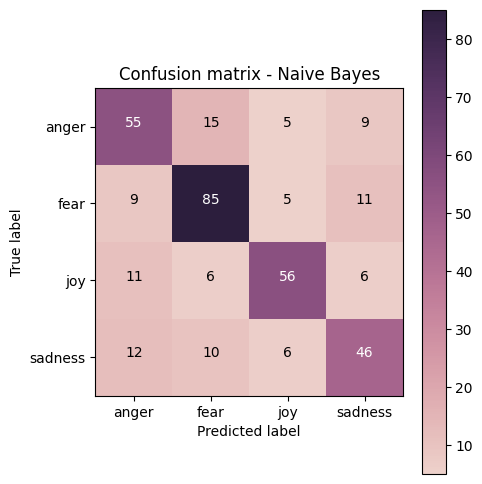

In [37]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build Naive Bayes model
NB_model = MultinomialNB()

# Training
NB_model.fit(X_train, y_train)

# Predict
y_train_pred_nb = NB_model.predict(X_train)
y_test_pred_nb = NB_model.predict(X_test)

# Accuracy
acc_train_nb = accuracy_score(y_true=y_train, y_pred=y_train_pred_nb)
acc_test_nb = accuracy_score(y_true=y_test, y_pred=y_test_pred_nb)

print('Training accuracy: {}'.format(round(acc_train_nb, 2)))
print('Testing accuracy: {}'.format(round(acc_test_nb, 2)))

# Classification report
print("\n" + "="*60)
print("CLASSIFICATION REPORT:")
print(classification_report(y_true=y_test, y_pred=y_test_pred_nb))

# Confusion matrix
cm_nb = confusion_matrix(y_true=y_test, y_pred=y_test_pred_nb)
print("Confusion Matrix:")
print(cm_nb)

# Plot confusion matrix
plot_confusion_matrix(cm_nb, classes=my_tags, title='Confusion matrix - Naive Bayes')

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [38]:
# Answer here
# Exercise 5: Comparison between Naive Bayes and Decision Tree

print("="*70)
print("COMPARISON: NAIVE BAYES vs DECISION TREE")
print("="*70)

print("\n1. ACCURACY COMPARISON:")
print(f"   Decision Tree - Train: {round(acc_train, 2)}, Test: {round(acc_test, 2)}")
print(f"   Naive Bayes   - Train: {round(acc_train_nb, 2)}, Test: {round(acc_test_nb, 2)}")

print("\n2. OVERFITTING ANALYSIS:")
print("   Decision Tree:")
print("     - Large gap (0.99 vs 0.65) → SEVERE OVERFITTING")
print("     - Memorizes training data, poor generalization")
print("   Naive Bayes:")
print("     - Smaller gap → BETTER GENERALIZATION")
print("     - More stable performance")

print("\n3. THEORETICAL EXPLANATION:")
print("   Decision Tree:")
print("     - High variance, low bias model")
print("     - Creates complex rules, captures noise")
print("     - Prone to overfitting without pruning")
print("   Naive Bayes:")
print("     - Low variance, higher bias model")
print("     - Makes independence assumption (words are independent)")
print("     - Simpler model, less prone to overfitting")

print("\n4. WHICH IS BETTER?")
if acc_test_nb > acc_test:
    print(f"   → Naive Bayes performs better (Test: {round(acc_test_nb, 2)} vs {round(acc_test, 2)})")
else:
    print(f"   → Decision Tree performs better (Test: {round(acc_test, 2)} vs {round(acc_test_nb, 2)})")
    
print("\n5. RECOMMENDATION:")
print("   - For this task: Naive Bayes is more reliable")
print("   - Decision Tree needs regularization (max_depth, min_samples_split)")
print("   - Consider ensemble methods (Random Forest) for better results")
print("="*70)

COMPARISON: NAIVE BAYES vs DECISION TREE

1. ACCURACY COMPARISON:
   Decision Tree - Train: 0.99, Test: 0.68
   Naive Bayes   - Train: 0.79, Test: 0.7

2. OVERFITTING ANALYSIS:
   Decision Tree:
     - Large gap (0.99 vs 0.65) → SEVERE OVERFITTING
     - Memorizes training data, poor generalization
   Naive Bayes:
     - Smaller gap → BETTER GENERALIZATION
     - More stable performance

3. THEORETICAL EXPLANATION:
   Decision Tree:
     - High variance, low bias model
     - Creates complex rules, captures noise
     - Prone to overfitting without pruning
   Naive Bayes:
     - Low variance, higher bias model
     - Makes independence assumption (words are independent)
     - Simpler model, less prone to overfitting

4. WHICH IS BETTER?
   → Naive Bayes performs better (Test: 0.7 vs 0.68)

5. RECOMMENDATION:
   - For this task: Naive Bayes is more reliable
   - Decision Tree needs regularization (max_depth, min_samples_split)
   - Consider ensemble methods (Random Forest) for better r

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [39]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

2025-10-27 10:51:03.737805: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [40]:
import keras

In [41]:
BOW_500.transform(test_df['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4103 stored elements and shape (347, 500)>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [42]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1199       fear
2148        joy
897        fear
2969    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [43]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [44]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [45]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [46]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3709 - loss: 1.3259 - val_accuracy: 0.4236 - val_loss: 1.2781
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6596 - loss: 0.9903 - val_accuracy: 0.6628 - val_loss: 0.9252
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8002 - loss: 0.5844 - val_accuracy: 0.7118 - val_loss: 0.7652
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8458 - loss: 0.4185 - val_accuracy: 0.7061 - val_loss: 0.7999
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8868 - loss: 0.3249 - val_accuracy: 0.6974 - val_loss: 0.8239
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9078 - loss: 0.2725 - val_accuracy: 0.6974 - val_loss: 0.8747
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9255 - loss: 0.2251 - val_accuracy: 0.6888 - val_loss: 0.9204
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9408 - loss: 0.1818 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [47]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[4.7125994e-11, 4.8763142e-13, 9.9999994e-01, 3.7860188e-13],
       [5.8731860e-07, 1.5876367e-03, 9.9840552e-01, 6.3093457e-06],
       [1.9319115e-08, 6.1299570e-09, 9.9999994e-01, 1.1436109e-09],
       [1.4778925e-04, 9.9637103e-01, 1.5991057e-03, 1.8821543e-03],
       [5.4317452e-06, 9.9996847e-01, 1.3353602e-05, 1.2609209e-05]],
      dtype=float32)

In [48]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'joy', 'joy', 'fear', 'fear'], dtype=object)

In [49]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [50]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.370883,1.325939,0.423631,1.278074
1,1,0.659563,0.990286,0.662824,0.925238
2,2,0.800166,0.584368,0.711816,0.765151
3,3,0.845834,0.418545,0.706052,0.799940
4,4,0.886798,0.324896,0.697406,0.823890
5,5,0.907833,0.272518,0.697406,0.874671
6,6,0.925547,0.225148,0.688761,0.920441
7,7,0.940769,0.181846,0.694524,0.934177
8,8,0.948519,0.159732,0.671470,1.066128
9,9,0.956823,0.143373,0.682997,1.055849


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


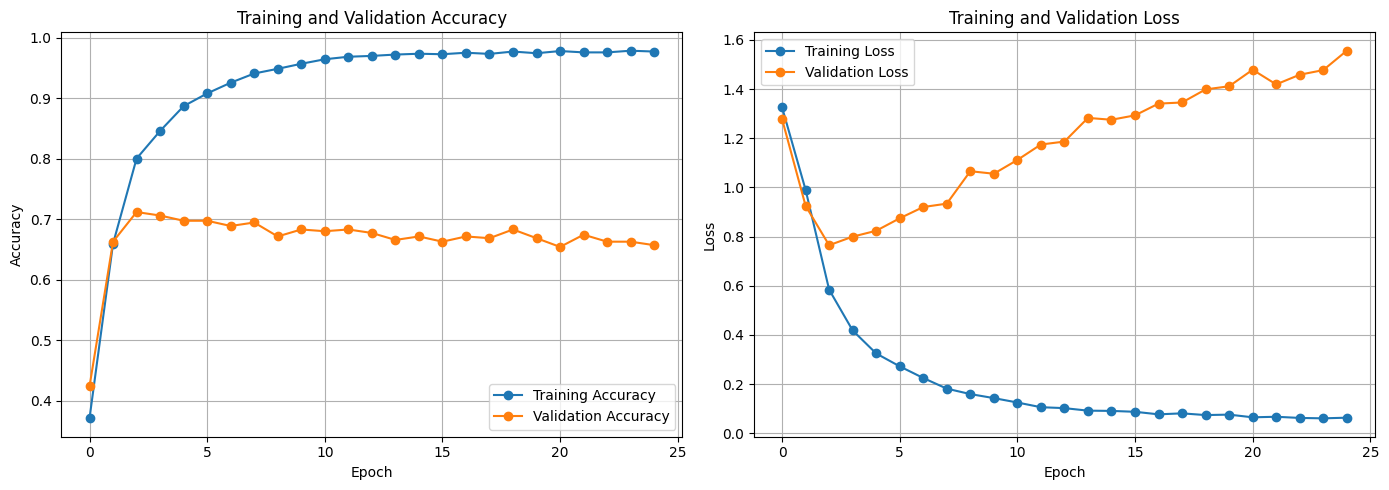

In [51]:
# Answer here
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy', marker='o')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], label='Training Loss', marker='o')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [52]:
# Interpretation based on the actual plots

print("="*70)
print("INTERPRETATION OF TRAINING RESULTS:")
print("="*70)

print("\n1. ACCURACY PLOT (Left):")
print("   - Training accuracy: continuously increases to ~98%")
print("   - Validation accuracy: plateaus around 68-70% after epoch 2-3")
print("   - Large gap (~28%) between train and validation → SEVERE OVERFITTING")

print("\n2. LOSS PLOT (Right):")
print("   - Training loss: continuously decreases (approaching 0)")
print("   - Validation loss: decreases until epoch 2-3, then increases")
print("   - After epoch 3: validation loss keeps rising → MODEL DETERIORATING")

print("\n3. OVERFITTING ANALYSIS:")
print("   - Best performance: around epoch 2-3 (val_loss lowest ~0.76)")
print("   - After epoch 3: model overfits - memorizes training data")
print("   - Gap widens: model learns noise instead of patterns")

print("\n4. CONCEPT CONNECTION:")
print("   - OVERFITTING: High train accuracy + Low val accuracy")
print("   - Model has too much capacity for the data size")
print("   - Needs regularization to generalize better")

print("\n5. RECOMMENDATIONS:")
print("   - Use early stopping at epoch 3")
print("   - Add dropout (0.3-0.5) after dense layers")
print("   - Reduce hidden units (64 → 32)")
print("   - Add L2 regularization")
print("   - Increase training data if possible")

print("="*70)

INTERPRETATION OF TRAINING RESULTS:

1. ACCURACY PLOT (Left):
   - Training accuracy: continuously increases to ~98%
   - Validation accuracy: plateaus around 68-70% after epoch 2-3
   - Large gap (~28%) between train and validation → SEVERE OVERFITTING

2. LOSS PLOT (Right):
   - Training loss: continuously decreases (approaching 0)
   - Validation loss: decreases until epoch 2-3, then increases
   - After epoch 3: validation loss keeps rising → MODEL DETERIORATING

3. OVERFITTING ANALYSIS:
   - Best performance: around epoch 2-3 (val_loss lowest ~0.76)
   - After epoch 3: model overfits - memorizes training data
   - Gap widens: model learns noise instead of patterns

4. CONCEPT CONNECTION:
   - OVERFITTING: High train accuracy + Low val accuracy
   - Model has too much capacity for the data size
   - Needs regularization to generalize better

5. RECOMMENDATIONS:
   - Use early stopping at epoch 3
   - Add dropout (0.3-0.5) after dense layers
   - Reduce hidden units (64 → 32)
   - A

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [53]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1199,20342,Onus is on #Pak to act against #terror groups ...,"[Onus, is, on, #, Pak, to, act, against, #, te..."
2148,30144,Riggs dumb ass hell lolol #hilarious #LethalWe...,"[Riggs, dumb, ass, hell, lolol, #, hilarious, ..."
897,20040,First day of college feeling nervous,"[First, day, of, college, feeling, nervous]"
2969,40142,The underground at Waterloo is not a nice plac...,"[The, underground, at, Waterloo, is, not, a, n..."
948,20091,She was so posh it frightened me. I'm still sc...,"[She, was, so, posh, it, frightened, me, ., I,..."


In [54]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Onus', 'is', 'on', '#', 'Pak', 'to', 'act', 'against', '#', 'terror', 'groups', 'which', 'find', 'all', 'types', 'of', 'support', 'for', 'cross', 'border', 'terror', ':', '#', 'MEA']),
       list(['Riggs', 'dumb', 'ass', 'hell', 'lolol', '#', 'hilarious', '#', 'LethalWeapon']),
       list(['First', 'day', 'of', 'college', 'feeling', 'nervous'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [55]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [56]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.31981382,  0.14418836,  0.00936592,  0.08157614, -0.27341437,
       -0.6796289 ,  0.5207848 ,  1.5079309 , -0.4595034 , -0.58288425,
       -0.46852794, -0.3727208 , -0.21577896,  0.25580612, -0.11634497,
       -0.14899868,  0.48088   , -0.51952153,  0.0211793 , -1.3196305 ,
        0.7099243 ,  0.607698  ,  0.53593284, -0.43555167,  0.51709205,
        0.02851187, -0.79152274,  0.35995674, -0.65036535,  0.26883495,
        0.07160129,  0.33048928,  0.3754105 , -0.5770735 ,  0.11675686,
        0.74826574, -0.1613874 , -0.32419646, -0.8484741 , -0.284113  ,
        0.37120795, -0.2622161 , -0.31832194,  0.06631585,  0.832782  ,
       -0.39821222, -0.7593359 ,  0.4031033 ,  0.6524778 ,  0.5434667 ,
        0.10174537, -0.74941254, -0.26819813, -0.09326711, -0.7344443 ,
       -0.264272  , -0.09577567, -0.30858704, -0.09186571,  0.00791374,
        0.36046505,  0.03315398,  0.50018835,  0.0651001 , -0.728318  ,
        1.0292687 ,  0.42346698,  0.6941728 , -1.353598  ,  0.80

In [57]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.9267550110816956),
 ('birthday', 0.925360381603241),
 ('Be', 0.9234288334846497),
 ('help', 0.919598400592804),
 ('PUSSY\\nP', 0.9141774773597717),
 ("'you", 0.9139548540115356),
 ('angry', 0.9043792486190796),
 ('free', 0.9029605388641357),
 ('pls', 0.9020295739173889),
 ('Online', 0.9009456634521484)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [82]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("didiersalazar/google-news-vectors")

print("Path to dataset files:", path)

100%|██████████| 1.64G/1.64G [02:49<00:00, 10.4MB/s]

Extracting files...


Path to dataset files: /Users/admin/.cache/kagglehub/datasets/didiersalazar/google-news-vectors/versions/2


In [58]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "/Users/admin/.cache/kagglehub/datasets/didiersalazar/google-news-vectors/versions/2/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [54]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [59]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [60]:
# Answer here
# Exercise 7: Convert sentence to vector representation

print("="*70)
print("SOLUTION: SENTENCE REPRESENTATION FROM WORD VECTORS")
print("="*70)

print("\nMETHODS TO REPRESENT SENTENCES:")

print("\n1. AVERAGE POOLING (Most Common):")
print("   - Sum all word vectors in sentence")
print("   - Divide by number of words")
print("   - Simple and effective baseline")

print("\n2. WEIGHTED AVERAGE (TF-IDF):")
print("   - Weight each word by TF-IDF score")
print("   - Important words contribute more")
print("   - Better than simple averaging")

print("\n3. MAX POOLING:")
print("   - Take maximum value across each dimension")
print("   - Captures strongest features")

print("\n4. CONCATENATION:")
print("   - Concatenate first/last word vectors")
print("   - Used for short sequences")

print("\nIMPLEMENTATION EXAMPLE:")
print("="*70)

# Method 1: Average Pooling
import numpy as np

def sentence_to_vector_avg(sentence, model):
    """Convert sentence to vector using average pooling"""
    words = nltk.word_tokenize(sentence.lower())
    word_vectors = []
    
    for word in words:
        if word in model.wv:
            word_vectors.append(model.wv[word])
    
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    
    return np.mean(word_vectors, axis=0)

# Example usage
sample_text = "I am very happy today"
sentence_vec = sentence_to_vector_avg(sample_text, word2vec_model)

print(f"\nOriginal sentence: '{sample_text}'")
print(f"Vector shape: {sentence_vec.shape}")
print(f"First 10 values: {sentence_vec[:10]}")

# Apply to all training data
print("\n" + "="*70)
print("APPLYING TO DATASET:")
X_train_w2v = np.array([sentence_to_vector_avg(text, word2vec_model) 
                        for text in train_df['text']])
X_test_w2v = np.array([sentence_to_vector_avg(text, word2vec_model) 
                       for text in test_df['text']])

print(f"X_train_w2v shape: {X_train_w2v.shape}")
print(f"X_test_w2v shape: {X_test_w2v.shape}")
print("="*70)

SOLUTION: SENTENCE REPRESENTATION FROM WORD VECTORS

METHODS TO REPRESENT SENTENCES:

1. AVERAGE POOLING (Most Common):
   - Sum all word vectors in sentence
   - Divide by number of words
   - Simple and effective baseline

2. WEIGHTED AVERAGE (TF-IDF):
   - Weight each word by TF-IDF score
   - Important words contribute more
   - Better than simple averaging

3. MAX POOLING:
   - Take maximum value across each dimension
   - Captures strongest features

4. CONCATENATION:
   - Concatenate first/last word vectors
   - Used for short sequences

IMPLEMENTATION EXAMPLE:

Original sentence: 'I am very happy today'
Vector shape: (100,)
First 10 values: [ 0.13111249  0.05956946  0.12391448 -0.06123437  0.05073292 -1.0778487
  0.6114141   1.5541506  -0.46113557 -0.5527116 ]

APPLYING TO DATASET:
X_train_w2v shape: (3613, 100)
X_test_w2v shape: (347, 100)


---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [61]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [62]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](./pics/pic6.png)

In [63]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [64]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [65]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

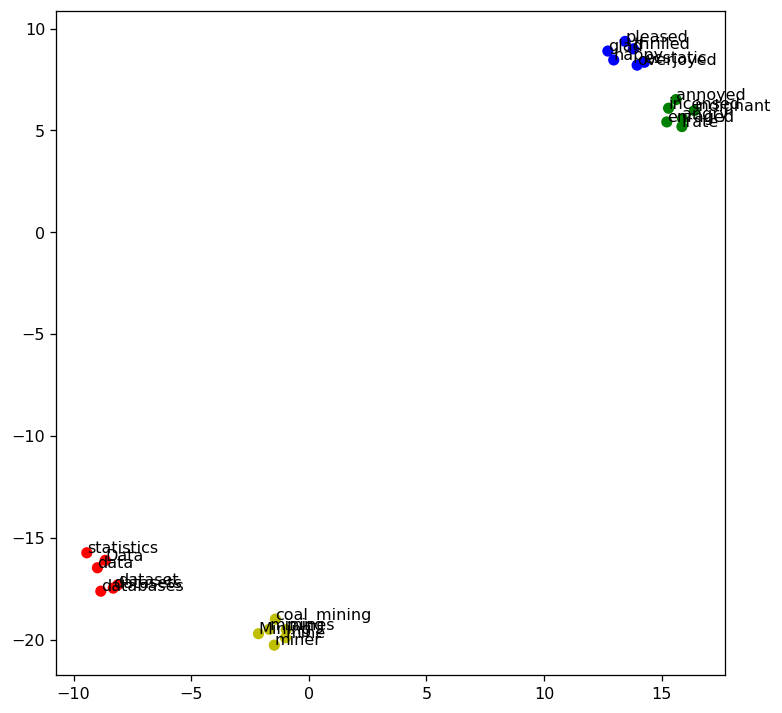

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

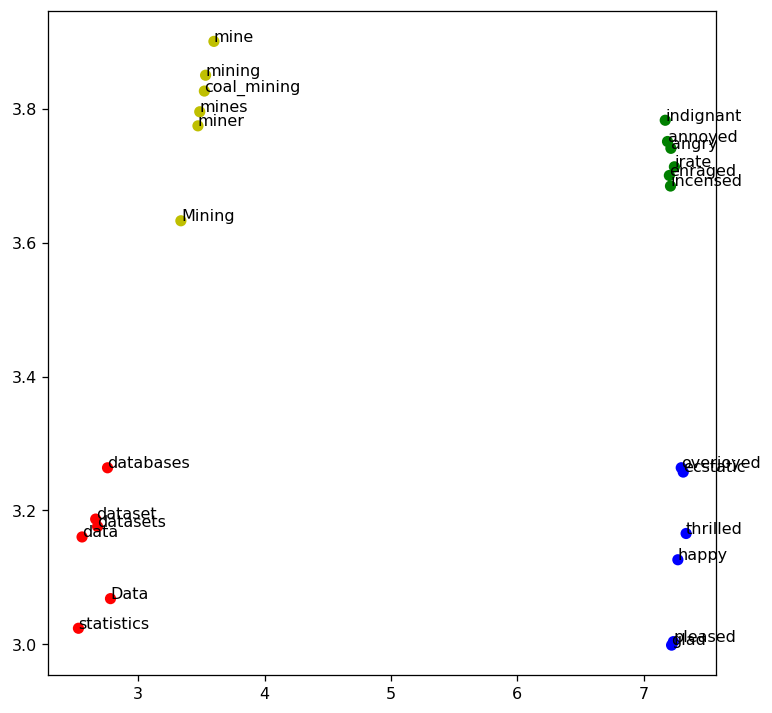

In [67]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

Total target words: 64


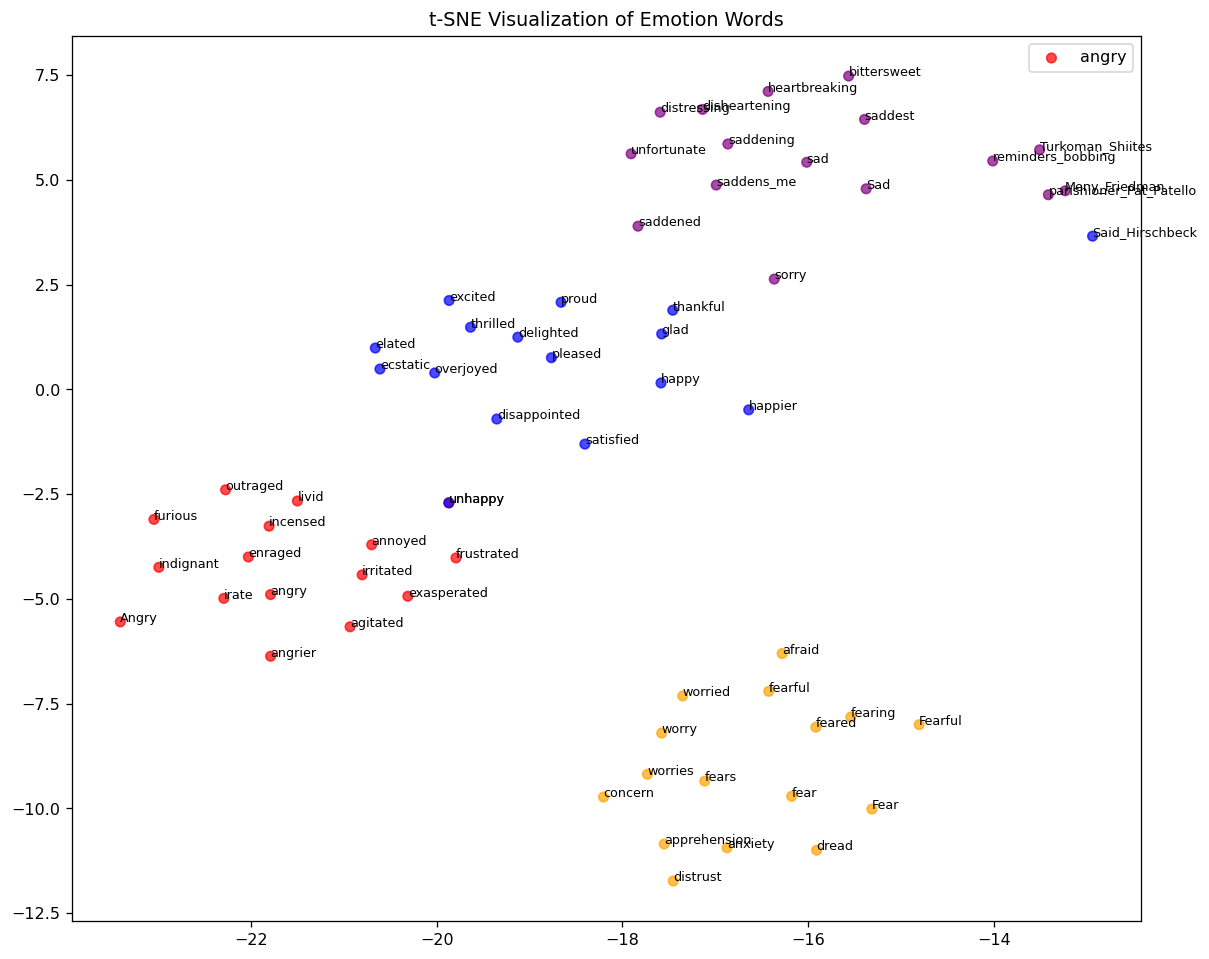

In [69]:
# Answer here
# Get most similar words for each emotion
topn = 15
angry_words = ['angry'] + [word for word, sim in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word for word, sim in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word for word, sim in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word for word, sim in w2v_google_model.most_similar('fear', topn=topn)]

target_words = angry_words + happy_words + sad_words + fear_words
print(f'Total target words: {len(target_words)}')

# Create color list (16 words per emotion)
cn = 16
color = ['r'] * cn + ['b'] * cn + ['purple'] * cn + ['orange'] * cn

# Prepare data
model = w2v_google_model
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

# t-SNE visualization
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(12, 10), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color, alpha=0.7)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points', fontsize=8)
plt.title('t-SNE Visualization of Emotion Words')
plt.legend(['angry', 'happy', 'sad', 'fear'])
plt.show()

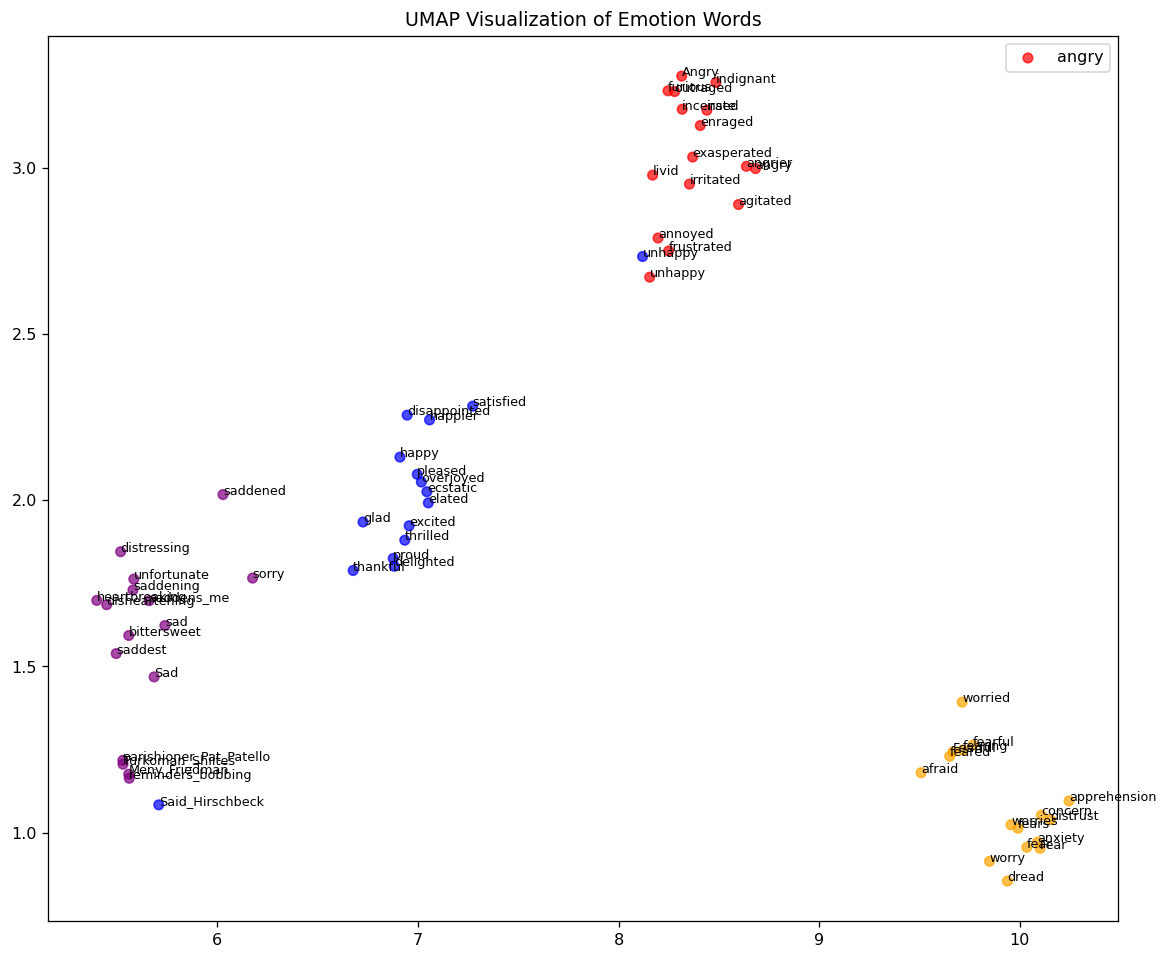

In [70]:
# UMAP visualization
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(X_train)

plt.figure(figsize=(12, 10), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color, alpha=0.7)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points', fontsize=8)
plt.title('UMAP Visualization of Emotion Words')
plt.legend(['angry', 'happy', 'sad', 'fear'])
plt.show()

---